SP-500 Price Predictions


Tools: Pandas, Yahoo Finance, Time-Series Analysis, Linear Regression, Statistics, ML

SP-500 stands for index tracking the stock performance of 500 leading companies listed on stock exchanges in the United States.



Yahoo Finance API is a comprehensive platform for accessing stock market data, financial news, company financials, and broader economic indicators. An API, is a tool that enables applications to interact with each other by accessing and exchanging data.

Prophet by META: Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

ARIMA - Autoregressive Integrated Moving Average (ARIMA) model to forecast time series data. ARIMA is a popular method for time series forecasting


SARIMA, which stands for Seasonal Autoregressive Integrated Moving Average, is a versatile and widely used time series forecasting model. It's an extension of the non-seasonal ARIMA model, designed to handle data with seasonal patterns

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from prophet import Prophet
from datetime import datetime
from itertools import product
import warnings
from scipy import stats
import statsmodels.api as sm
from prophet import Prophet

In [4]:
#installing yfinance
!pip install yfinance

In [5]:
#downloading historical data through API
import yfinance as yf
sp500 = yf.download("^GSPC")
sp500.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,0


In [6]:
sp500.tail()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2025-05-12,5844.189941,5845.370117,5786.080078,5807.200195,6014580000
2025-05-13,5886.549805,5906.640137,5845.020020,5854.149902,5516290000
2025-05-14,5892.580078,5906.549805,5872.109863,5896.740234,5233450000
2025-05-15,5916.930176,5924.209961,5865.160156,5869.819824,4991290000
2025-05-16,5958.379883,5958.620117,5907.359863,5929.089844,4850850000


Exploratory Data Analysis


Our downloaded historical data is containing index prices for SP-500 from 1927 to last closed price day.

In [7]:
sp500.shape

(24460, 5)

In [8]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24460 entries, 1927-12-30 to 2025-05-16
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   24460 non-null  float64
 1   (High, ^GSPC)    24460 non-null  float64
 2   (Low, ^GSPC)     24460 non-null  float64
 3   (Open, ^GSPC)    24460 non-null  float64
 4   (Volume, ^GSPC)  24460 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.1 MB


In [9]:
sp500.isnull().sum()

,,0
Price,Ticker,
Close,^GSPC,0
High,^GSPC,0
Low,^GSPC,0
Open,^GSPC,0
Volume,^GSPC,0


From above introduction to our historical data, we can conclude that the data is already in time-series format, as we have DateTimeIndex which is in the range of 1927-12-30 to 2025-05-16

Data Preparation for ARIMA model

Prerequisites for ARIMA model:



1.   Time Series Data - datetime index
2.   Stationary Data -  ADF, KPSS
3.   Identification of Model Order (p, d, q) - ACF, PCF, AR, MA
4.   Model Performance
5.   Model Evaluation




1. Check for Time Series Data - we already get familiar with data and we know that we have DateTime Index, but I am performing some checks to get know data better and prove we have enough data points.

In [10]:
#check dtype of index

sp500.index.dtype

dtype('<M8[ns]')

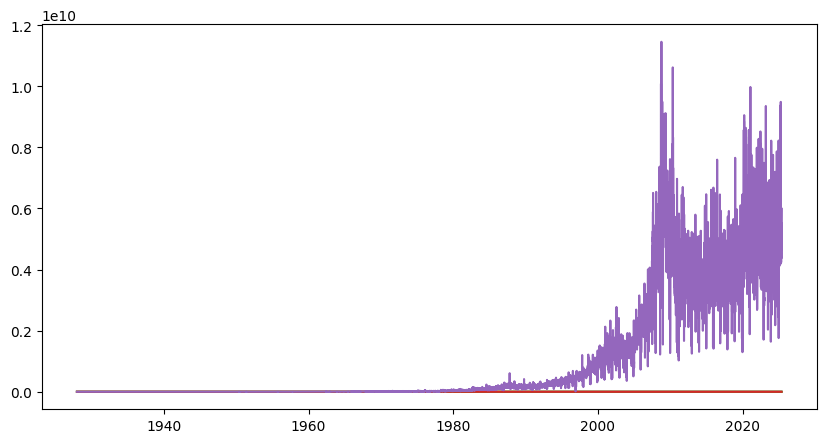

In [11]:
#check if we have sufficient data points
plt.figure(figsize=(10,5))
plt.plot(sp500)

We proved that we have Date Time as Index in our dataset as data preparation and we have sufficient data point to proceed with Time Series Analysis - ARIMA model.

We will prepare Data Sampling as Monthly, Yearly, Daily, Quarterly.
Also we will sample our data from 2000 to Present to Predict the next day close price.

Data Preparation

Data Sampling and Creation of Moving Averages

In [12]:
sp500_yearly = sp500.resample('Y').mean()
sp500_monthly = sp500.resample('M').mean()
sp_500_quarterly = sp500.resample('Q').mean()
sp500_daily = sp500.resample('D').mean()

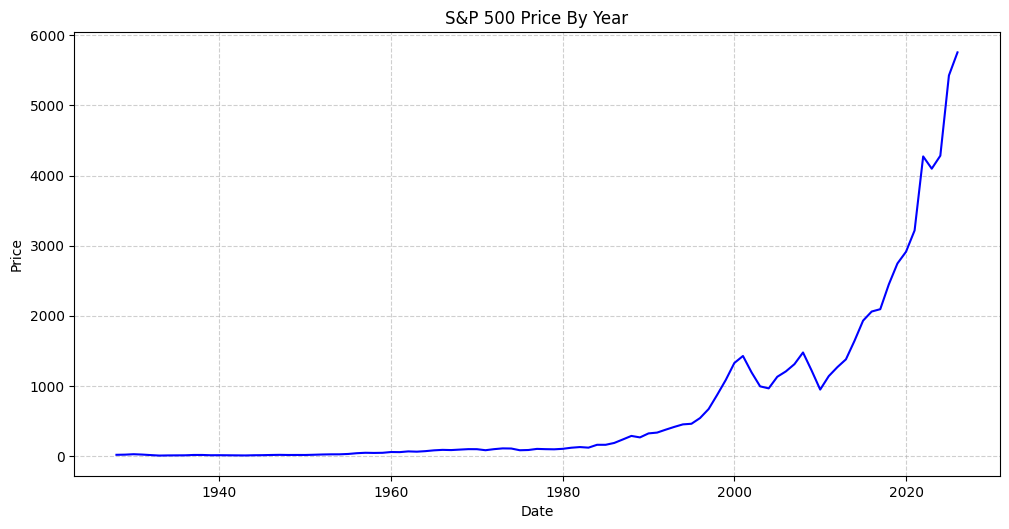

In [13]:
plt.figure(figsize=(10,5))
plt.plot(sp500_yearly.index, sp500_yearly['Close'], label='Close Price', color='blue')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('S&P 500 Price By Year')
plt.show()

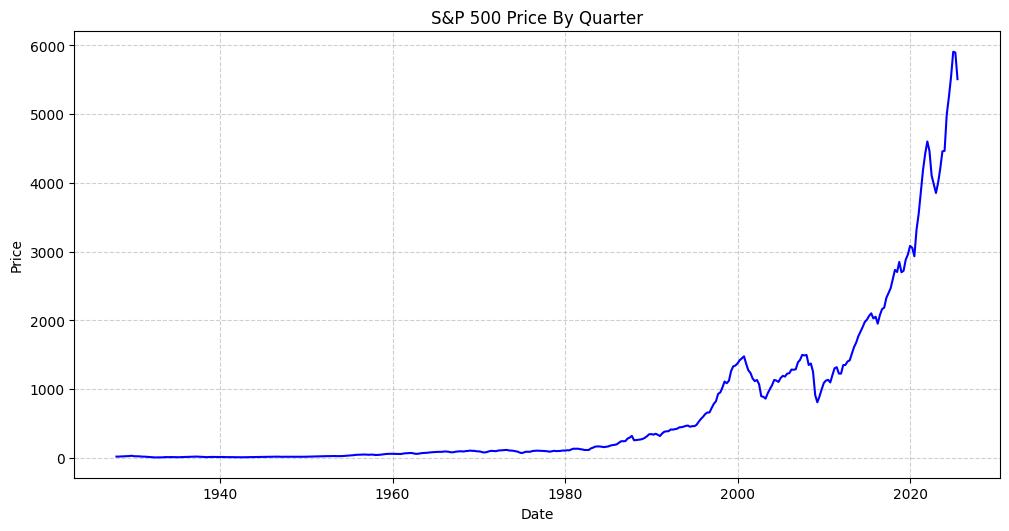

In [14]:
plt.figure(figsize=(10,5))
plt.plot(sp_500_quarterly.index, sp_500_quarterly['Close'], label='Close Price', color='blue')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('S&P 500 Price By Quarter')
plt.show()

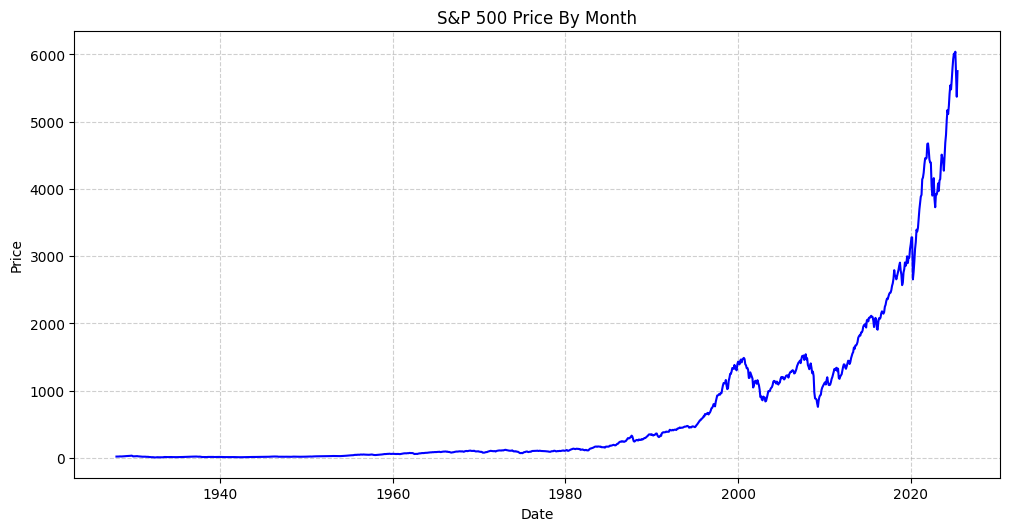

In [15]:
plt.figure(figsize=(10,5))
plt.plot(sp500_monthly.index, sp500_monthly['Close'], label='Close Price', color='blue')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('S&P 500 Price By Month')
plt.show()

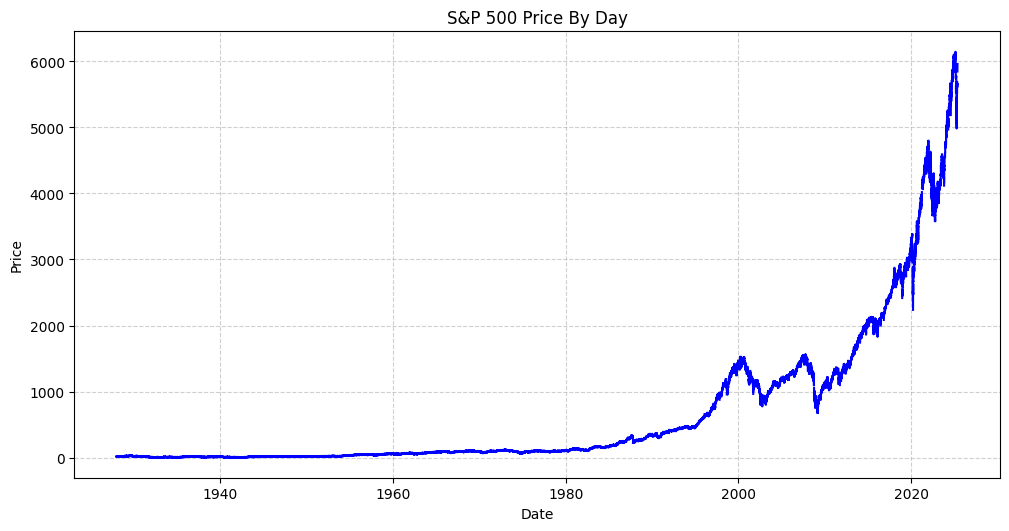

In [16]:
plt.figure(figsize=(10,5))
plt.plot(sp500_daily.index, sp500_daily['Close'], label='Close Price', color='blue')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('S&P 500 Price By Day')
plt.show()

As we have enourmous historical data and we could see the price of index before 2000 is small and we could not see from the scale. We will perform data sampling for last 25 years to have more reliable data and cut off the oldest data

In [17]:
sp_25 = sp500.loc['2000-01-01':]
sp_25.head()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000
2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000
2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000
2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000


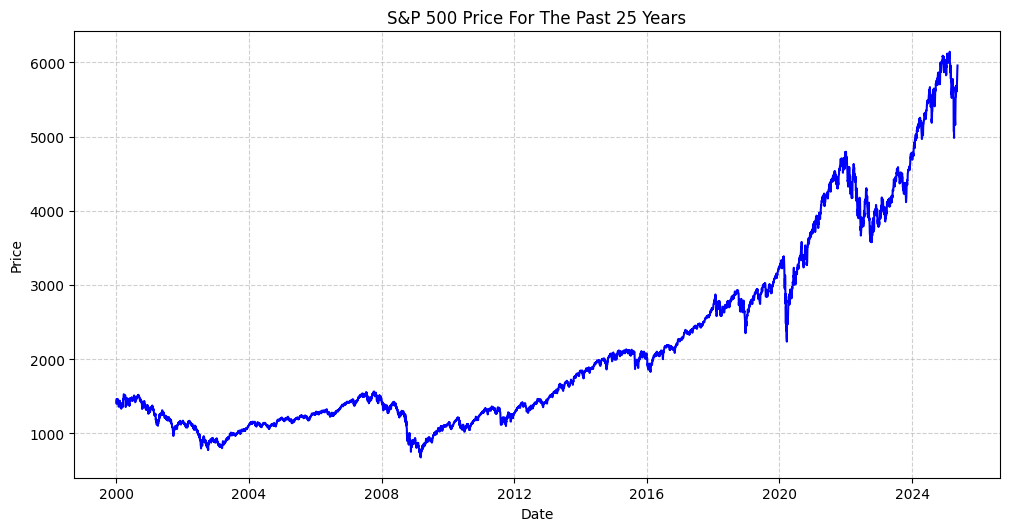

In [18]:
plt.figure(figsize=(10,5))
plt.plot(sp_25.index, sp_25['Close'], label='Close Price', color='blue')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('S&P 500 Price For The Past 25 Years')
plt.show()

In [19]:
sp_15 = sp_25.loc['2010-01-01':]
sp_15.head()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000
2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000
2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000
2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000
2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000


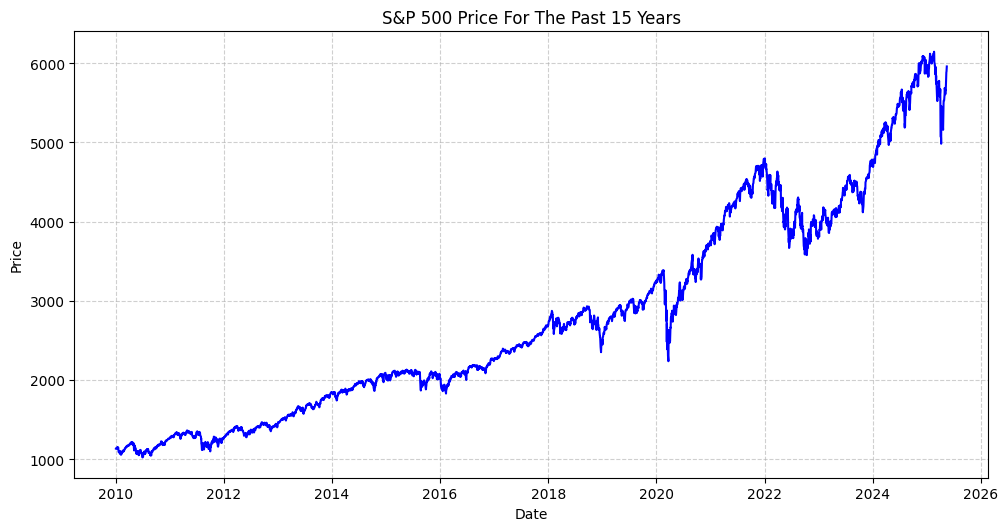

In [20]:
plt.figure(figsize=(10,5))
plt.plot(sp_15.index, sp_15['Close'], label='Close Price', color='blue')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('S&P 500 Price For The Past 15 Years')
plt.show()

Data Sampling of our historical dataset we analyzed how the line plot is visualized, what is our trend, in which timeframes we have more volatility, seasonality. From the last data sample - SP 500 Last 15 Years, we will create a
60 Day Moving Average and 30 Day Moving Average and we will add it to our price chart.

Moving Averages, a statistical method in data analysis, smooths fluctuations in time-series data to reveal underlying trends

In [21]:
ma_30days = sp_15['Close'].rolling(window=30).mean()
ma_60days = sp_15['Close'].rolling(window=60).mean()
sma_30days = sp_15['Close'].rolling(window=30).mean()
sma_60days = sp_15['Close'].rolling(window=60).mean()

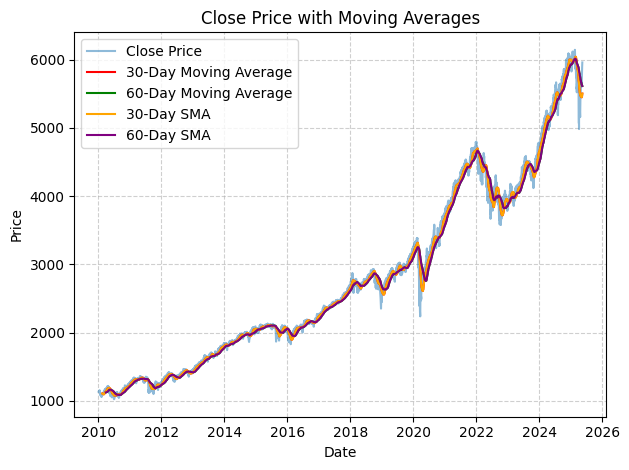

In [22]:
plt.plot(sp_15.index, sp_15['Close'], label='Close Price', alpha=0.5)
plt.plot(sp_15.index, ma_30days, label='30-Day Moving Average', color='red')
plt.plot(sp_15.index, ma_60days, label='60-Day Moving Average', color='green')
plt.plot(sp_15.index, sma_30days, label='30-Day SMA', color='orange')
plt.plot(sp_15.index, sma_60days, label='60-Day SMA', color='purple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price with Moving Averages')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

TEST Stationary Data - ADF, KPSS

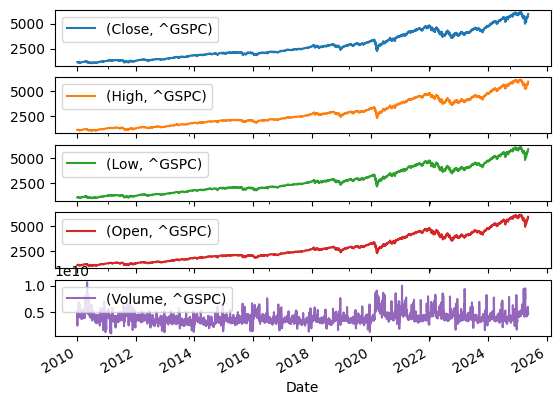

In [23]:
import matplotlib.pyplot as plt
sp_15.plot(subplots=True)
plt.show()

From above visualization we can visible confirm that in our Column for Index Price we don't have stationary data. Rather than Column Volume, where we have more likely stationary data. The Mean values in Volume are more stable.

Now, we will perform data transformation to prepare our data in more likely stationary and perform STTS

Seasonal Decomposition is a technique used to separate a time series into several components:

Trend (long-term progression)

Seasonality (repeating short-term cycle)

Residual/Noise (random variation)

You can perform Seasonal Decomposition using seasonal_decompose from statsmodels. Here's how to apply it—especially useful for making non-stationary data more understandable and preparing it for forecasting.

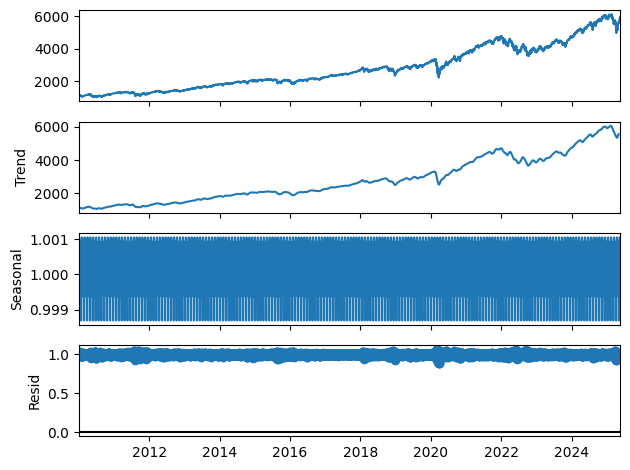

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

sp_15 = sp_15.asfreq('D')
sp_15['Close'].interpolate(inplace=True)

result = seasonal_decompose(sp_15['Close'], model='multiplicative', period=30)

result.plot()
plt.show()

We can see we have upward trend, seasonalirty and residuals in 1.

Perform Sampling on Monthly

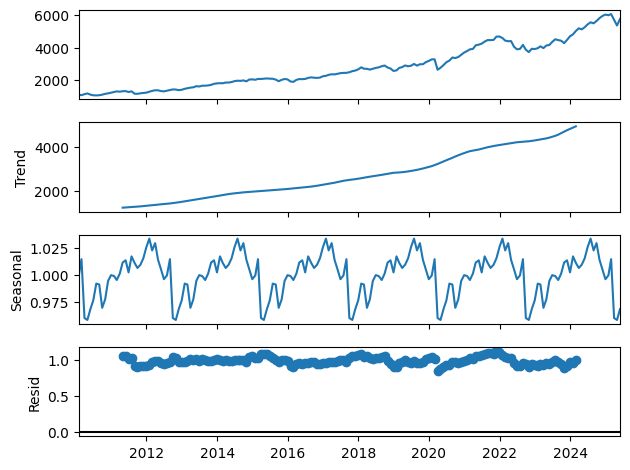

In [26]:
sp_15monthly = sp_15.resample('M').mean()

sp_15monthly = sp_15monthly.asfreq('M')
sp_15monthly['Close'].interpolate(inplace=True)

result = seasonal_decompose(sp_15monthly['Close'], model='multiplicative', period=30)

result.plot()
plt.show()


ARIMA, SARIMAX, Prophet

Detrending with Rolling Means and Rolling Std

In [27]:
sp15 = sp_15.copy()

In [28]:
ma_30days_mean = sp_15['Close'].rolling(window=30).mean()
ma_30days_std = sp_15['Close'].rolling(window=30).std()

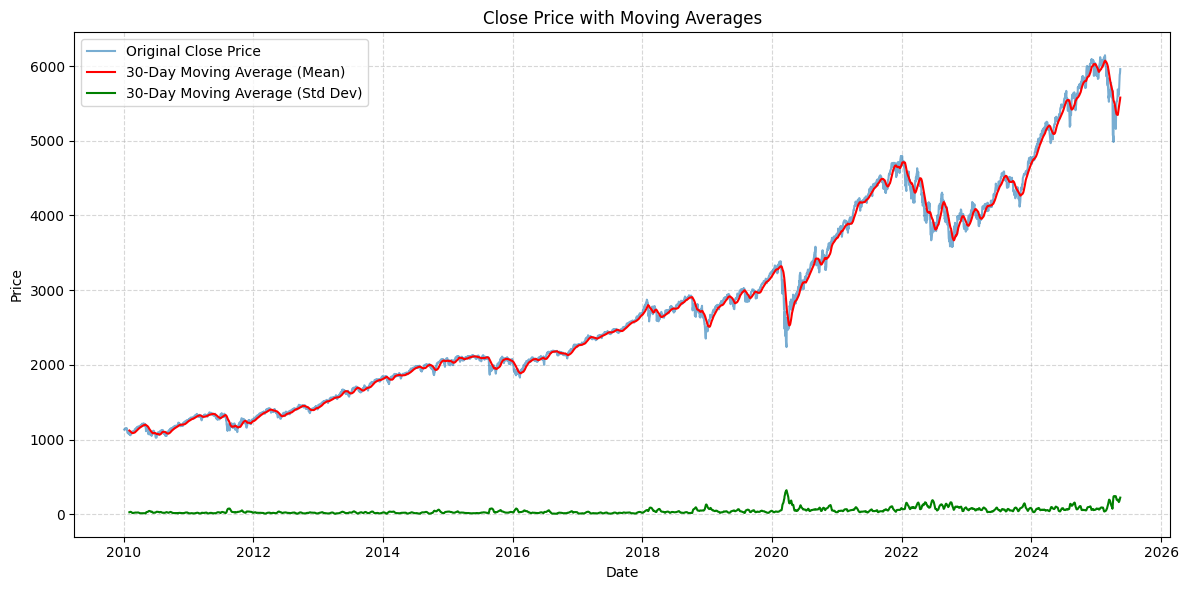

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(sp15.index, sp15['Close'], label='Original Close Price', alpha=0.6)
plt.plot(sp15.index, ma_30days_mean, color='red', label='30-Day Moving Average (Mean)')
plt.plot(sp15.index, ma_30days_std, color='green', label='30-Day Moving Average (Std Dev)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price with Moving Averages')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


ADF Results with Rolling Windows = smooth trend, stationary data

In [36]:
from statsmodels.tsa.stattools import adfuller


adf_result = adfuller(result.resid.dropna())
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -3.1193772619433178
p-value: 0.02515202376475798
Critical Values:
   1%: -3.4776006742422374
   5%: -2.882265832283648
   10%: -2.5778219289774156


In [37]:
series_name = 'Close'
if adf_result[1] <= 0.05:
    print(
        "The p-value is less than or equal to 0.05, so we reject the null hypothesis."
    )
    print(
        f"This suggests that the {series_name} is likely stationary."
    )
else:
    print(
        "The p-value is greater than 0.05, so we fail to reject the null hypothesis."
    )
    print(
        f"This suggests that the {series_name} is likely non-stationary."
    )

print(
    "\nNote: The more negative the ADF Statistic, the stronger the rejection of the null hypothesis."
)
print(
    "Compare the ADF Statistic to the Critical Values. If the ADF Statistic is more negative than a critical value,"
    " we reject the null hypothesis at that significance level."
)

The p-value is less than or equal to 0.05, so we reject the null hypothesis.
This suggests that the Close is likely stationary.

Note: The more negative the ADF Statistic, the stronger the rejection of the null hypothesis.
Compare the ADF Statistic to the Critical Values. If the ADF Statistic is more negative than a critical value, we reject the null hypothesis at that significance level.


Our Close Data is likely stationary. We could proceed with ARIMA Model

p - lag order AR
d - number of differences (stationary)
q - lag order of errors MA

In [38]:
from statsmodels.tsa.arima.model import ARIMA

In [40]:
close =  sp_15['Close']

In [41]:
model = ARIMA(close, order=(4, 0, 1))  # (p=4, d=0, q=1)
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
results = model_fit.predict(len(close), len(close))
print(results)

2025-05-17    5955.848303
Freq: D, dtype: float64


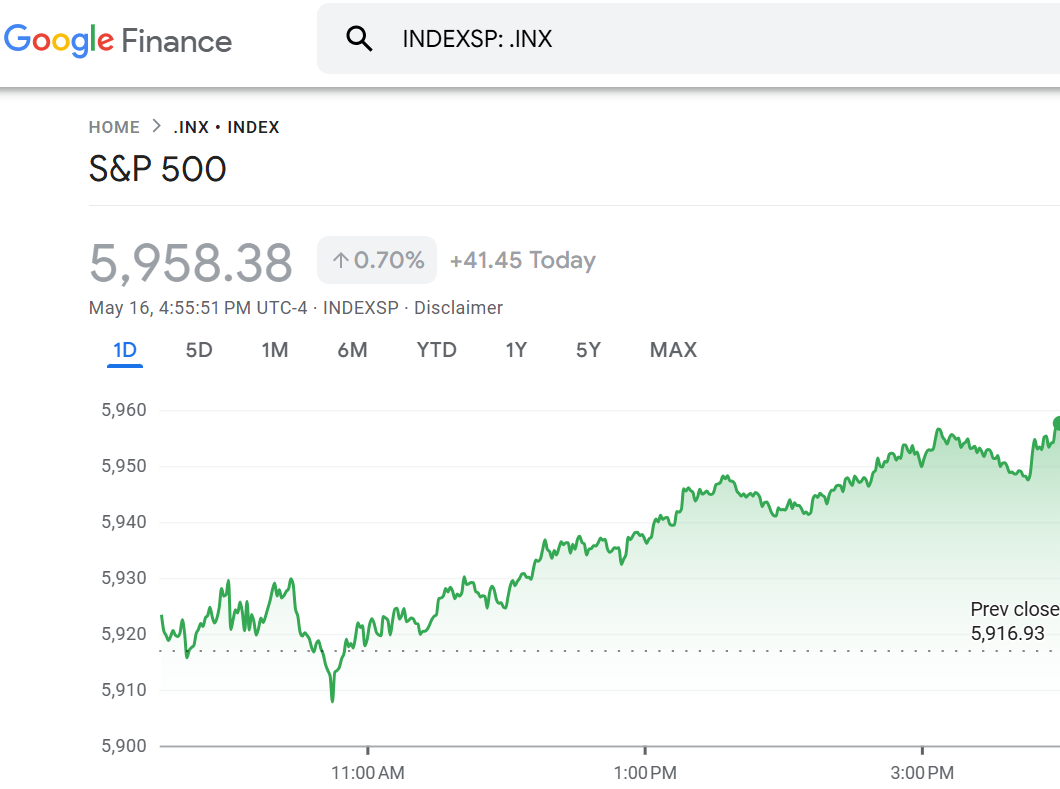

According to my ARIMA model, the price of index SP500 for 2025-05-017 will be 5955.848303. SP500 is not trading over the weekends, I will select the next predicted day for Monday.

Changing the frequency to Business Day and Run ARIMA with new parameters

In [43]:
sp_15_b = sp_15.asfreq('B')
b_close = sp_15_b['Close']

In [44]:
model = ARIMA(b_close, order=(2, 1, 1))
model_fit = model.fit()


In [45]:
last_date = b_close.index[-1]
forecast_horizon = pd.bdate_range(start=last_date + pd.Timedelta(days=1), end='2025-12-31')
forecast = model_fit.forecast(steps=len(forecast_horizon))
forecast.index = forecast_horizon

In [46]:
may19_price = forecast.loc['2025-05-19']
print("Forecasted Close Price for Monday, May 19, 2025:", may19_price)

Forecasted Close Price for Monday, May 19, 2025: 5952.7010493770285
